# Setup

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime
from sklearn import model_selection, metrics  #to include metrics for evaluation 
from sklearn.model_selection import train_test_split
%matplotlib inline

# Fed funds rate data: add a column denoting rate changed or not from previous month

In [68]:
ffr_df = pd.read_csv('fedfundsrates/fed_funds_target_rates_Dec2018_Sep1982.csv')

In [69]:
# Check if it renders correctly
ffr_df.head()

,DATE,DFEDTAR_20081215
0,9/27/82,10.25
1,9/28/82,10.25
2,9/29/82,10.25
3,9/30/82,10.25
4,10/1/82,10.00


In [30]:
# Info about the data
ffr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9587 entries, 0 to 9586
Data columns (total 2 columns):
DATE                9587 non-null object
DFEDTAR_20081215    9587 non-null float64
dtypes: float64(1), object(1)
memory usage: 149.9+ KB


In [70]:
# Add a new column that denotes how much the rate changed from the previous month
ffr_df = pd.read_csv('fedfundsrates/fed_funds_target_rates_Dec2018_Sep1982.csv')
df = pd.DataFrame(ffr_df)
df['Diff'] = df['DFEDTAR_20081215'].diff(1)
print(df) 


          DATE  DFEDTAR_20081215    Diff
0      9/27/82           10.2500     NaN
1      9/28/82           10.2500  0.0000
2      9/29/82           10.2500  0.0000
3      9/30/82           10.2500  0.0000
4      10/1/82           10.0000 -0.2500
5      10/2/82           10.0000  0.0000
6      10/3/82           10.0000  0.0000
7      10/4/82           10.0000  0.0000
8      10/5/82           10.0000  0.0000
9      10/6/82           10.0000  0.0000
10     10/7/82            9.5000 -0.5000
11     10/8/82            9.5000  0.0000
12     10/9/82            9.5000  0.0000
13    10/10/82            9.5000  0.0000
14    10/11/82            9.5000  0.0000
15    10/12/82            9.5000  0.0000
16    10/13/82            9.5000  0.0000
17    10/14/82            9.5000  0.0000
18    10/15/82            9.5000  0.0000
19    10/16/82            9.5000  0.0000
20    10/17/82            9.5000  0.0000
21    10/18/82            9.5000  0.0000
22    10/19/82            9.5000  0.0000
23    10/20/82  

In [71]:
# Add a new column to denote if a rate
# changed based on the previous month
# 1 is changed; 0 is did not change
df['Changed'] = np.where(df['Diff']!=0.0000, 1, 0)
print(df) 

          DATE  DFEDTAR_20081215    Diff  Changed
0      9/27/82           10.2500     NaN        1
1      9/28/82           10.2500  0.0000        0
2      9/29/82           10.2500  0.0000        0
3      9/30/82           10.2500  0.0000        0
4      10/1/82           10.0000 -0.2500        1
5      10/2/82           10.0000  0.0000        0
6      10/3/82           10.0000  0.0000        0
7      10/4/82           10.0000  0.0000        0
8      10/5/82           10.0000  0.0000        0
9      10/6/82           10.0000  0.0000        0
10     10/7/82            9.5000 -0.5000        1
11     10/8/82            9.5000  0.0000        0
12     10/9/82            9.5000  0.0000        0
13    10/10/82            9.5000  0.0000        0
14    10/11/82            9.5000  0.0000        0
15    10/12/82            9.5000  0.0000        0
16    10/13/82            9.5000  0.0000        0
17    10/14/82            9.5000  0.0000        0
18    10/15/82            9.5000  0.0000        0


In [72]:
# Modify date string to a timestamp in format %Y%m%d

# First remove the / then modify to date format %Y%m%d
df['DATE'] = df['DATE'].replace('/', '', regex=True)

# Then put into date format m d Y
df.DATE = pd.to_datetime(df.DATE, format='%m%d%y')
df.head()

,DATE,DFEDTAR_20081215,Diff,Changed
0,1982-09-27,10.25,NaN,1
1,1982-09-28,10.25,0.00,0
2,1982-09-29,10.25,0.00,0
3,1982-09-30,10.25,0.00,0
4,1982-10-01,10.00,-0.25,1


# Text data: Create a dataframe that includes the cleaned text doc content and adds a column for the date of the document taken from the file name

In [73]:
# Get a list of filenames from the local cleaned statements directory using glob library 
import glob
filenames = glob.glob('statements/statements.clean/*.txt')

# Initialize an empty list
# Then loop through the file list, and create a dictionary with the file dates and content
records = []
for filename in filenames:   
    data = open(filename).read()
    date = filename.split('/')[-1].split('.')[-2]
    record = {'filedate':date,'document':data}
    records.append(record)

In [34]:
docdf = pd.DataFrame(records)
docdf.head()

,document,filedate
0,fomc decid today rais target fedfundsr bas poi...,20051213
1,fomc meet today decid low target fedfundsr bas...,20010515
2,fomc decid today rais target fedfundsr bas poi...,20041214
3,fomc decid today leav target fedfundsr unchang...,19991005
4,fomc meet today decid maintain ex stant monet ...,20001219


In [74]:
# Modify filedate string to a timestamp
docdf.filedate = pd.to_datetime(docdf.filedate, format='%Y%m%d')
docdf.head()

,document,filedate
filedate,,
2005-12-13,fomc decid today rais target fedfundsr bas poi...,2005-12-13
2001-05-15,fomc meet today decid low target fedfundsr bas...,2001-05-15
2004-12-14,fomc decid today rais target fedfundsr bas poi...,2004-12-14
1999-10-05,fomc decid today leav target fedfundsr unchang...,1999-10-05
2000-12-19,fomc meet today decid maintain ex stant monet ...,2000-12-19


In [63]:
# This section is under construction ...
# Create a new column indicating if a rate changed within x days (7?) after document published
# To do this, for each row in df subtract the dates, gets the minimum difference row for 
# rate_change df and gets the corresponding date and rate change and adds those as fields

# Define a function with filedate as the parameter that figures out if the rate changed w/in 7 days after doc date
# Combining Conditional Statements and Functions that passes a list as a parameter

# SANDBOX:
# docdf.index.name = None

# Try #2: so I tried sorting the values first for content df
# docdf.sort_values(by=['filedate'])
# That di not work error: ValueError: 'filedate' is both an index level and a column label, which is ambiguous.
#docdf.head()

# docdf.index = docdf['filedate']
# df.index = df['DATE']

# Sample code from SO post for merge_asof:
# tol = pd.Timedelta('3 day')
# df3 = pd.merge_asof(left=df1,right=df2,right_index=True,left_index=True,direction='nearest',tolerance=tol)

# Try #1:
# tol = pd.Timedelta('7 day')
# change_df = pd.merge_asof(left=docdf,right=df,right_index=True,left_index=True,direction='nearest',tolerance=tol)
# This gives error: ValueError: left keys must be sorted

# Try #3: I tried sorting values dyring merge based on SO advice:
change_df = pd.merge_asof(left=docdf,right=df,right_index=True,left_index=True,direction='nearest',tolerance=tol.sort_values('filedate'),on='filedate')
# Errored: AttributeError: 'Timedelta' object has no attribute 'sort_values'
# Pandas doc says: DatetimeIndex will now raise an AttributeError when the tz attribute is set after instantiation (GH3746)
# https://pandas.pydata.org/pandas-docs/version/0.23.3/whatsnew.html

# Try #4:
# Maybe try timedelta? https://pandas.pydata.org/pandas-docs/version/0.23.3/merging.html#merging-merge-asof
# Sample code (but does not address sorting):
# In [128]: pd.merge_asof(trades, quotes,
#    .....:               on='time',
#    .....:               by='ticker',
#    .....:               tolerance=pd.Timedelta('2ms'))

# BELOW HERE IS JUNK FROM BEFORE THAT DID NOT WORK
# Compare the 2 df and show how many days apart are the dates
# First make sure the columns on both df have the same name; in docdf rename filedate -> DATE
#docdf.rename({'filedate': 'DATE'}, axis=1, inplace=True)
# docdf.head()
#df['days_apart'] = (df['df'] - df['docdf']).dt.days
# days_apart.head()

# For dates that are 7 days apart or less, see if the date changed (it changed if it is a 1 in the dates df)
# Could maybe do these two things in one step (compare days apart and check if changed)
# ---
# def did_rate_change(filedate):
# for docdf is there a rate change date w/in 7 days
# 
#     if filedate in document: # xxxx Need a calc here to see if date of date df is within 7 days after date in content df
#         return ('1') # if it did change w/in 7 days after doc date put 0
    # look at the rate change column in date df and see if it changed (1)
    # if it changed put 1, if it did not change put 0
#     else:
#        return ('0') # if it did NOT change w/in 7 days after doc date put 0

# Apply the function to the content df
# docdf['filedate'].apply(did_rate_change)

AttributeError: 'Timedelta' object has no attribute 'sort_values'

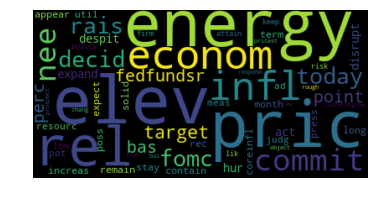

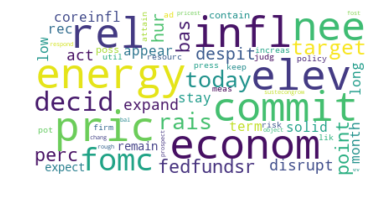

There are 28760 words in the combination of all documents.


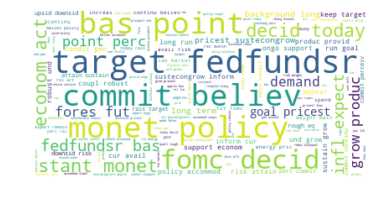

In [84]:
# EDA using WordCloud
# imports 
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline                                                                                      

# Start with one document
text = docdf.document[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image in the img folder:
wordcloud.to_file("images/first_doc_allwords_cloud.png")

# Make it look better
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Save the image in the img folder:
wordcloud.to_file("images/first_doc_cloud_100words.png")

# Combine all documents into a single word cloud
text = " ".join(review for review in docdf.document) # Need to update words here
print ("There are {} words in the combination of all documents.".format(len(text)))

# Create stopword list:
# Skip this for now need to figure out which stopwords if needed
# stopwords = set(STOPWORDS)
# stopwords.update(["stopone", "stoptwo", "stopthree", "stopfour", "stopfive"])

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)
# When stopwords added change to this: wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image in the img folder:
wordcloud.to_file("images/all_doc_cloud.png")